In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
import warnings
warnings.simplefilter('ignore')

 **LOAD DATASET**

In [3]:
df=pd.read_csv('/content/Hotel Reservations - Hotel Reservations.csv')

**EXPLORATORY DATA ANALYSIS**

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2.0,0.0,1.0,2.0,Meal Plan 1,0.0,Room_Type 1,224.0,2017.0,10.0,2.0,Offline,0.0,0.0,0.0,65.00,0.0,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,Canceled
6,INN00007,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,34.0,2017.0,10.0,15.0,Online,0.0,0.0,0.0,107.55,1.0,Not_Canceled
7,INN00008,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 4,83.0,2018.0,12.0,26.0,Online,0.0,0.0,0.0,105.61,1.0,Not_Canceled
8,INN00009,3.0,0.0,0.0,4.0,Meal Plan 1,0.0,Room_Type 1,121.0,2018.0,7.0,6.0,Offline,0.0,0.0,0.0,96.90,1.0,Not_Canceled
9,INN00010,2.0,0.0,0.0,5.0,Meal Plan 1,0.0,Room_Type 4,44.0,2018.0,10.0,18.0,Online,0.0,0.0,0.0,133.44,3.0,Not_Canceled


In [6]:
df.shape

(36278, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36278 entries, 0 to 36277
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36278 non-null  object 
 1   no_of_adults                          36275 non-null  float64
 2   no_of_children                        36275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  float64
 4   no_of_week_nights                     36275 non-null  float64
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  float64
 10  arrival_month                         36275 non-null  float64
 11  arrival_date   

In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


**Visualization / Data Wrangling**

In [9]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            3
no_of_children                          3
no_of_weekend_nights                    3
no_of_week_nights                       3
type_of_meal_plan                       3
required_car_parking_space              3
room_type_reserved                      3
lead_time                               3
arrival_year                            3
arrival_month                           3
arrival_date                            3
market_segment_type                     3
repeated_guest                          3
no_of_previous_cancellations            3
no_of_previous_bookings_not_canceled    3
avg_price_per_room                      3
no_of_special_requests                  3
booking_status                          3
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.shape

(36275, 19)

In [12]:
corr_matrix=df.corr(method='spearman')
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


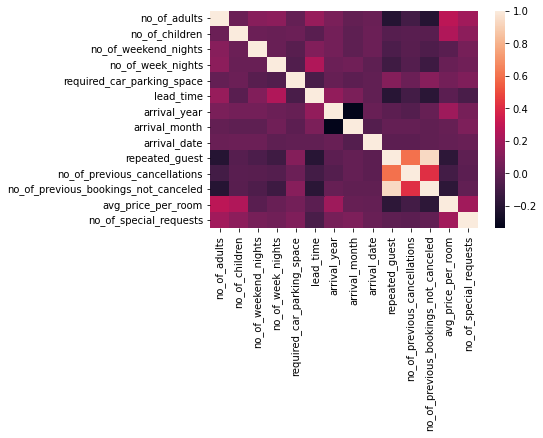

In [13]:
hm = sns.heatmap(data = corr_matrix)
plt.show()

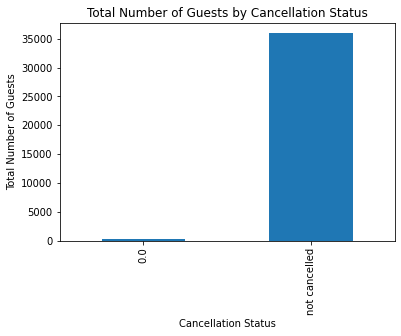

In [14]:
df['cancelled'] = df['no_of_previous_cancellations'].apply(lambda x: 0.0 if x > 0 else 'not cancelled')


guest_counts = df.groupby('cancelled')['no_of_adults'].count()

# plot the resulting DataFrame as a bar chart
guest_counts.plot(kind='bar')
plt.title('Total Number of Guests by Cancellation Status')
plt.xlabel('Cancellation Status')
plt.ylabel('Total Number of Guests')
plt.show()


In [15]:
df['no_of_previous_cancellations'].value_counts()

0.0     35937
1.0       198
2.0        46
3.0        43
11.0       25
5.0        11
4.0        10
13.0        4
6.0         1
Name: no_of_previous_cancellations, dtype: int64

In [ ]:
# plt.clf()
# plt.rcParams["figure.figsize"]=[10,5]
# df.groupby(['no_of_previous_cancellations','no_of_week_nights']).size().plot(kind='bar')
# plt.xlabel("\ncombinations")
# plt.show()

**Data split (X,y, train, test)**

In [19]:
X=df.iloc[:,0:18].values
y=df.iloc[:,18].values

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,7,12])],remainder='passthrough')
X=ct.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

**ML Method 1**

In [22]:
rfc=RandomForestClassifier(n_estimators=18,random_state=42)
rfc.fit(X_train,y_train)
preds = rfc.predict(X_test) 


In [ ]:
# print("Not cancelled are ",df[df['booking_status']=='Not_Canceled'].Booking_ID.count())
# print("cancelled are ",df[df['booking_status']=='Canceled'].Booking_ID.count())

**ML Method 2**

In [23]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)


DecisionTreeClassifier(random_state=42)

**ML Method 3**

In [24]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

**Accuracy Estimation**

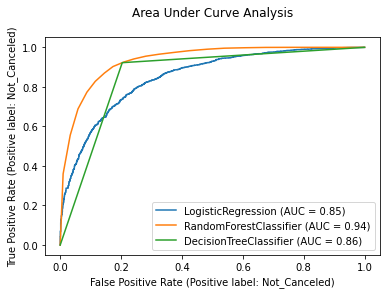

In [25]:
from sklearn.metrics import RocCurveDisplay
disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.title('Area Under Curve Analysis\n')
RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=disp.ax_)
RocCurveDisplay.from_estimator(dt, X_test, y_test, ax=disp.ax_)


In [26]:
print(accuracy_score(y_test, rfc.predict(X_test)))

0.8807718814610613


**Confusion Matrix**

In [27]:
# the count of true negatives is [0,0]; false negatives is [1,0] , true positives is [1,1] and false positives is [0,1].
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[1815,  579],
       [ 286, 4575]])

**Precision**

In [28]:
from sklearn import metrics

precision_positive = metrics.precision_score(y_test, preds, pos_label='Canceled')
precision_negative = metrics.precision_score(y_test, preds, pos_label='Not_Canceled')
precision_positive, precision_negative 

(0.8638743455497382, 0.8876600698486612)